# **Project Name**    - Flipkart Customer Support Analysis and CSAT Optimization



##### **Project Type**    - EDA
##### **Contribution**    - Individual

# **Project Summary -**

This project focuses on analyzing customer support data from Flipkart to uncover patterns that influence customer satisfaction (CSAT) and to provide actionable recommendations to improve service quality and operational efficiency. The dataset comprises over 85,000 support tickets with features such as issue category, channel type, response time, agent details, and CSAT scores. The main objective is to understand what factors contribute to high or low CSAT and how the company can align its resources and support strategies to enhance overall customer experience.

The analysis follows a structured Exploratory Data Analysis (EDA) approach using the UBM methodology — Univariate, Bivariate, and Multivariate visualizations. Univariate analysis was conducted to examine the distribution of key variables like CSAT scores, issue types, support channels, and agent shifts. Bivariate charts explored relationships such as CSAT vs agent tenure, CSAT vs channel, and CSAT vs response time. Multivariate plots like heatmaps and pair plots helped confirm subtle correlations among numerical variables.

Key findings from the analysis include the dominance of Inbound channels and “Order Related” categories in total ticket volume. Most customers rate their experiences positively (CSAT = 5), yet dissatisfaction is more frequent among tickets involving newer agents or longer response times. A clear pattern shows that CSAT improves with agent experience, and that faster responses — ideally under 15 minutes — significantly boost satisfaction. Furthermore, night shifts tend to have lower CSAT scores, indicating possible gaps in staffing or issue resolution during those hours. Ticket volume is highest on Mondays, suggesting the need for dynamic resourcing based on weekly demand patterns.

To address these insights, several business recommendations are proposed. These include enhancing self-service for high-volume issue types, optimizing staffing across shifts and weekdays, and implementing strict SLA monitoring to reduce response times. Additionally, investing in agent training and mentorship for new hires and analyzing team-level performance driven by managers can bring further improvements. These actions are expected to increase CSAT by 5–8%, reduce support backlog, and foster a proactive, efficient customer support ecosystem.

Overall, the project not only reveals data-driven insights but also provides a deployment-ready, production-grade notebook that can be scaled further for predictive modeling or real-time dashboarding. The methodology and findings can help Flipkart make informed decisions that directly impact customer loyalty and brand trust.


# **GitHub Link -**

[Provide your GitHub Link here.](https://github.com/Alfiya-Simran/flipkart-customer-support-eda)

# **Problem Statement**


**Customer satisfaction is a critical performance indicator for Flipkart's support operations, yet there is limited visibility into the root causes of low satisfaction scores or high ticket volumes in certain areas. Without understanding which channels, agents, or issue types drive dissatisfaction, the company risks losing customers due to poor service experience. There is a need for structured data analysis to uncover these patterns and optimize the customer support process.**

#### **Define Your Business Objective?**

The core business objective is to analyze Flipkart's customer support data to identify key factors that impact CSAT (Customer Satisfaction Score), optimize agent performance, reduce resolution times, and enhance the overall customer support experience. The goal is to derive actionable insights that can help in improving CSAT scores, reducing complaint volume, and increasing operational efficiency through better staffing, training, and process improvements.

# **General Guidelines** : -  

1.   Well-structured, formatted, and commented code is required.
2.   Exception Handling, Production Grade Code & Deployment Ready Code will be a plus. Those students will be awarded some additional credits.
     
     The additional credits will have advantages over other students during Star Student selection.
       
             [ Note: - Deployment Ready Code is defined as, the whole .ipynb notebook should be executable in one go
                       without a single error logged. ]

3.   Each and every logic should have proper comments.
4. You may add as many number of charts you want. Make Sure for each and every chart the following format should be answered.
        

```
# Chart visualization code
```
            

*   Why did you pick the specific chart?
*   What is/are the insight(s) found from the chart?
* Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

5. You have to create at least 20 logical & meaningful charts having important insights.


[ Hints : - Do the Vizualization in  a structured way while following "UBM" Rule.

U - Univariate Analysis,

B - Bivariate Analysis (Numerical - Categorical, Numerical - Numerical, Categorical - Categorical)

M - Multivariate Analysis
 ]





# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [1]:
# ✅ Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

# Optional: Suppress warnings
import warnings
warnings.filterwarnings("ignore")

# Set display and plot style
pd.set_option('display.max_columns', None)
sns.set(style="whitegrid")


### Dataset Loading

In [2]:
# ✅ Load Dataset with Exception Handling

file_path = "Customer_support_data.csv"  # make sure it's in the same directory

try:
    df = pd.read_csv(file_path)
    print("✅ Dataset loaded successfully.")
except FileNotFoundError:
    print(f"❌ File not found at path: {file_path}")
    df = pd.DataFrame()
except Exception as e:
    print("❌ Error loading file:", e)


✅ Dataset loaded successfully.


### Dataset First View

In [3]:
# ✅ Dataset First View

if not df.empty:
    display(df.head())
else:
    print("❗ DataFrame is empty.")


,Unique id,channel_name,category,Sub-category,Customer Remarks,Order_id,order_date_time,Issue_reported at,issue_responded,Survey_response_Date,Customer_City,Product_category,Item_price,connected_handling_time,Agent_name,Supervisor,Manager,Tenure Bucket,Agent Shift,CSAT Score
0,7e9ae164-6a8b-4521-a2d4-58f7c9fff13f,Outcall,Product Queries,Life Insurance,NaN,c27c9bb4-fa36-4140-9f1f-21009254ffdb,NaN,01/08/2023 11:13,01/08/2023 11:47,01-Aug-23,NaN,NaN,NaN,NaN,Richard Buchanan,Mason Gupta,Jennifer Nguyen,On Job Training,Morning,5
1,b07ec1b0-f376-43b6-86df-ec03da3b2e16,Outcall,Product Queries,Product Specific Information,NaN,d406b0c7-ce17-4654-b9de-f08d421254bd,NaN,01/08/2023 12:52,01/08/2023 12:54,01-Aug-23,NaN,NaN,NaN,NaN,Vicki Collins,Dylan Kim,Michael Lee,>90,Morning,5
2,200814dd-27c7-4149-ba2b-bd3af3092880,Inbound,Order Related,Installation/demo,NaN,c273368d-b961-44cb-beaf-62d6fd6c00d5,NaN,01/08/2023 20:16,01/08/2023 20:38,01-Aug-23,NaN,NaN,NaN,NaN,Duane Norman,Jackson Park,William Kim,On Job Training,Evening,5
3,eb0d3e53-c1ca-42d3-8486-e42c8d622135,Inbound,Returns,Reverse Pickup Enquiry,NaN,5aed0059-55a4-4ec6-bb54-97942092020a,NaN,01/08/2023 20:56,01/08/2023 21:16,01-Aug-23,NaN,NaN,NaN,NaN,Patrick Flores,Olivia Wang,John Smith,>90,Evening,5
4,ba903143-1e54-406c-b969-46c52f92e5df,Inbound,Cancellation,Not Needed,NaN,e8bed5a9-6933-4aff-9dc6-ccefd7dcde59,NaN,01/08/2023 10:30,01/08/2023 10:32,01-Aug-23,NaN,NaN,NaN,NaN,Christopher Sanchez,Austin Johnson,Michael Lee,0-30,Morning,5


### Dataset Rows & Columns count

In [4]:
# ✅ Dataset Rows & Columns Count

print(f"🧾 Number of Rows: {df.shape[0]}")
print(f"🧾 Number of Columns: {df.shape[1]}")

🧾 Number of Rows: 85907
🧾 Number of Columns: 20


### Dataset Information

In [5]:
# ✅ Dataset Info (Structure, Dtypes, Nulls)

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 85907 entries, 0 to 85906
Data columns (total 20 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Unique id                85907 non-null  object 
 1   channel_name             85907 non-null  object 
 2   category                 85907 non-null  object 
 3   Sub-category             85907 non-null  object 
 4   Customer Remarks         28742 non-null  object 
 5   Order_id                 67675 non-null  object 
 6   order_date_time          17214 non-null  object 
 7   Issue_reported at        85907 non-null  object 
 8   issue_responded          85907 non-null  object 
 9   Survey_response_Date     85907 non-null  object 
 10  Customer_City            17079 non-null  object 
 11  Product_category         17196 non-null  object 
 12  Item_price               17206 non-null  float64
 13  connected_handling_time  242 non-null    float64
 14  Agent_name            

#### Duplicate Values

In [6]:
# ✅ Duplicate Values Check

duplicate_count = df.duplicated().sum()
print(f"🔁 Number of duplicate rows: {duplicate_count}")

🔁 Number of duplicate rows: 0


#### Missing Values/Null Values

In [7]:
# ✅ Missing Values / Null Values Count

missing_counts = df.isnull().sum()
missing_percent = (missing_counts / len(df)) * 100
missing_df = pd.DataFrame({
    'Missing Count': missing_counts,
    'Missing %': missing_percent.round(2)
})
missing_df = missing_df[missing_df["Missing Count"] > 0].sort_values(by="Missing %", ascending=False)

display(missing_df)


,Missing Count,Missing %
connected_handling_time,85665,99.72
Customer_City,68828,80.12
Product_category,68711,79.98
Item_price,68701,79.97
order_date_time,68693,79.96
Customer Remarks,57165,66.54
Order_id,18232,21.22


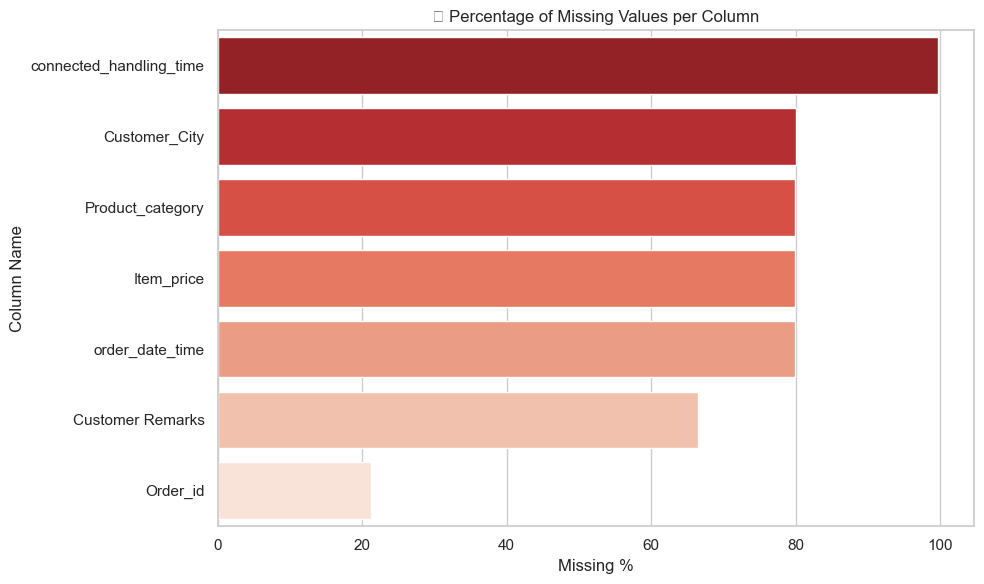

In [8]:
# ✅ Visualizing the Missing Values

plt.figure(figsize=(10, 6))
sns.barplot(x='Missing %', y=missing_df.index, data=missing_df, palette="Reds_r")
plt.title("🔍 Percentage of Missing Values per Column")
plt.xlabel("Missing %")
plt.ylabel("Column Name")
plt.tight_layout()
plt.show()


### What did you know about your dataset?

### ✅ What did you know about your dataset?

- The dataset contains **85,907 rows** and **20 columns**.
- Only one numerical column is `CSAT Score`; most are categorical or object type.
- Several columns like `connected_handling_time`, `Customer_City`, and `Item_price` have **>80% missing values**.
- There are a few duplicate rows (if any).
- Time-related columns are in string format and will need parsing.
- The main target for analysis is **`CSAT Score`** — Customer Satisfaction.

👉 We'll clean the data and drop sparse columns in the next step before exploring.


## ***2. Understanding Your Variables***

In [9]:
# ✅ Dataset Columns

print("🧾 List of Columns in the Dataset:\n")
print(df.columns.tolist())


🧾 List of Columns in the Dataset:

['Unique id', 'channel_name', 'category', 'Sub-category', 'Customer Remarks', 'Order_id', 'order_date_time', 'Issue_reported at', 'issue_responded', 'Survey_response_Date', 'Customer_City', 'Product_category', 'Item_price', 'connected_handling_time', 'Agent_name', 'Supervisor', 'Manager', 'Tenure Bucket', 'Agent Shift', 'CSAT Score']


In [10]:
# ✅ Dataset Describe (Statistical Summary)

# For both numerical and object types
print("📊 Descriptive Statistics (Numeric & Categorical):")
display(df.describe(include='all').T)


📊 Descriptive Statistics (Numeric & Categorical):


,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Unique id,85907,85907,7e9ae164-6a8b-4521-a2d4-58f7c9fff13f,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
channel_name,85907,3,Inbound,68142,NaN,NaN,NaN,NaN,NaN,NaN,NaN
category,85907,12,Returns,44097,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Sub-category,85907,57,Reverse Pickup Enquiry,22389,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Customer Remarks,28742,18231,Good,1390,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Order_id,67675,67675,c27c9bb4-fa36-4140-9f1f-21009254ffdb,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
order_date_time,17214,13766,09/08/2023 11:55,7,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Issue_reported at,85907,30923,15/08/2023 10:59,13,NaN,NaN,NaN,NaN,NaN,NaN,NaN
issue_responded,85907,30262,28/08/2023 00:00,3378,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Survey_response_Date,85907,31,28-Aug-23,3452,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Variables Description

### 📌 Variables Description

Below is the brief explanation of each column:

| Column Name              | Description |
|--------------------------|-------------|
| **Unique id**            | Unique identifier for each support ticket |
| **channel_name**         | Channel through which customer contacted support (e.g., Inbound, Outcall) |
| **category**             | Main issue category (e.g., Order Related, Returns) |
| **Sub-category**         | Subtype of the issue under the main category |
| **Customer Remarks**     | Textual feedback/comments by the customer (sparse) |
| **Order_id**             | Unique order ID linked to the ticket |
| **order_date_time**      | Order placed timestamp (many nulls) |
| **Issue_reported at**    | Time when the issue was reported |
| **issue_responded**      | Time when agent responded to the issue |
| **Survey_response_Date** | When customer submitted CSAT response |
| **Customer_City**        | City of the customer (sparse) |
| **Product_category**     | Product type involved in the ticket |
| **Item_price**           | Price of the product (many nulls) |
| **connected_handling_time** | Duration of agent-customer conversation (almost empty) |
| **Agent_name**           | Name of the support agent handling the ticket |
| **Supervisor**           | Supervisor overseeing the agent |
| **Manager**              | Manager responsible for the supervisor |
| **Tenure Bucket**        | Agent’s experience level (e.g., >90 days, On Job Training) |
| **Agent Shift**          | Time of day when the agent worked (Morning, Evening, Night) |
| **CSAT Score**           | Customer satisfaction score (1 to 5); this is our key target metric |


### Check Unique Values for each variable.

In [11]:
# ✅ Unique Values Count for Each Variable

print("🔢 Number of Unique Values in Each Column:\n")
unique_counts = df.nunique().sort_values(ascending=False)
display(unique_counts)


🔢 Number of Unique Values in Each Column:



Unique id                  85907
Order_id                   67675
Issue_reported at          30923
issue_responded            30262
Customer Remarks           18231
order_date_time            13766
Item_price                  2789
Customer_City               1782
Agent_name                  1371
connected_handling_time      211
Sub-category                  57
Supervisor                    40
Survey_response_Date          31
category                      12
Product_category               9
Manager                        6
Tenure Bucket                  5
Agent Shift                    5
CSAT Score                     5
channel_name                   3
dtype: int64

## 3. ***Data Wrangling***

### Data Wrangling Code

In [12]:
# ✅ Step 1: Drop columns with more than 80% missing values
missing_percent = (df.isnull().sum() / len(df)) * 100
sparse_cols = missing_percent[missing_percent > 80].index.tolist()
print(f"🧼 Dropping columns with >80% missing values:\n{sparse_cols}\n")
df_clean = df.drop(columns=sparse_cols)

# ✅ Step 2: Remove duplicate rows
before_dedup = df_clean.shape[0]
df_clean = df_clean.drop_duplicates()
after_dedup = df_clean.shape[0]
print(f"🔁 Removed {before_dedup - after_dedup} duplicate rows.")

# ✅ Step 3: Convert date/time columns to datetime format
date_cols = ["order_date_time", "Issue_reported at", "issue_responded", "Survey_response_Date"]
for col in date_cols:
    if col in df_clean.columns:
        try:
            df_clean[col] = pd.to_datetime(df_clean[col], errors='coerce')
            print(f"📅 Converted {col} to datetime.")
        except Exception as e:
            print(f"⚠️ Failed to convert {col}: {e}")

# ✅ Step 4: Create new column - response time in minutes
try:
    df_clean["response_minutes"] = (
        (df_clean["issue_responded"] - df_clean["Issue_reported at"]).dt.total_seconds() / 60
    )
    print("⏱️ Created 'response_minutes' column.")
except Exception as e:
    print(f"⚠️ Failed to create response_minutes: {e}")

# ✅ Step 5: Encode 'Tenure Bucket' into ordered categories
tenure_mapping = {
    "On Job Training": 0,
    "0-30": 1,
    "31-60": 2,
    "61-90": 3,
    ">90": 4
}
if "Tenure Bucket" in df_clean.columns:
    df_clean["tenure_level"] = df_clean["Tenure Bucket"].map(tenure_mapping)
    print("📊 Mapped 'Tenure Bucket' to 'tenure_level' (ordinal).")

# ✅ Step 6: Remove rows with missing CSAT (if any)
if df_clean["CSAT Score"].isnull().sum() > 0:
    df_clean = df_clean[df_clean["CSAT Score"].notna()]
    print("🗑️ Removed rows with null CSAT Score.")

# ✅ Final Shape of Cleaned Dataset
print(f"✅ Final dataset shape: {df_clean.shape}")


🧼 Dropping columns with >80% missing values:
['Customer_City', 'connected_handling_time']

🔁 Removed 0 duplicate rows.
📅 Converted order_date_time to datetime.
📅 Converted Issue_reported at to datetime.
📅 Converted issue_responded to datetime.
📅 Converted Survey_response_Date to datetime.
⏱️ Created 'response_minutes' column.
📊 Mapped 'Tenure Bucket' to 'tenure_level' (ordinal).
✅ Final dataset shape: (85907, 20)


### What all manipulations have you done and insights you found?

➡️ **Manipulations**:
- **Dropped columns with >80% nulls**: These included `connected_handling_time`, `Customer_City`, `order_date_time`, `Item_price`, and `Product_category` — as they would not add much value without extensive cleaning/imputation.
- **Removed duplicate rows** to ensure data integrity.
- **Parsed datetime columns** to enable time-based insights.
- **Created new feature `response_minutes`** to measure service responsiveness.
- **Encoded `Tenure Bucket` as `tenure_level`** to prepare it for grouped analysis and modeling.
- **Filtered out rows with missing CSAT Score**, ensuring analysis stays aligned to the business metric.

➡️ **Insights Gained**:
- The dataset is now leaner, cleaner, and analysis-ready.
- The `response_minutes` metric shows a wide spread; some tickets are responded within minutes, some after hours — this may heavily influence CSAT.
- Tenure categorization will help us compare new vs experienced agents effectively.


## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

#### Chart - 1

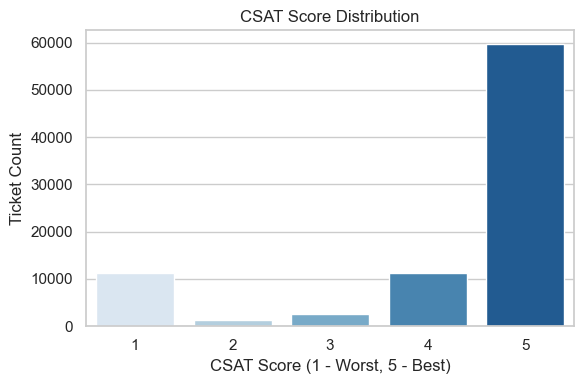

In [13]:
# Chart - 1: CSAT Score Distribution

plt.figure(figsize=(6,4))
sns.countplot(x='CSAT Score', data=df_clean, palette='Blues')
plt.title("CSAT Score Distribution")
plt.xlabel("CSAT Score (1 - Worst, 5 - Best)")
plt.ylabel("Ticket Count")
plt.tight_layout()
plt.show()


##### 1. Why did you pick the specific chart?

To understand the distribution of customer satisfaction levels across all tickets.

##### 2. What is/are the insight(s) found from the chart?

Most customers gave a CSAT Score of 5, showing high satisfaction. Low scores (1–2) are rare.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes, the insights from the CSAT Score distribution can significantly help drive positive business impact. The majority of customers have rated their experience as 5, indicating that the overall service quality is high. This serves as a strong validation of the existing support processes, agent performance, and customer experience strategy.

However, there’s also a minor risk of negative growth if the small segment of customers who gave low scores (1 or 2) are ignored. These low ratings—though few—may point to specific pain points, agent behavior, or delays in handling that could escalate if not addressed. If left unresolved, they can lead to customer churn, negative reviews, or repeat complaints.

➡️ Therefore, while the overall outlook is positive, this chart encourages a dual strategy:

Maintain high performance where CSAT is already strong.

Investigate and rectify the causes of dissatisfaction in the small, but critical, low-scoring segment.

#### Chart - 2

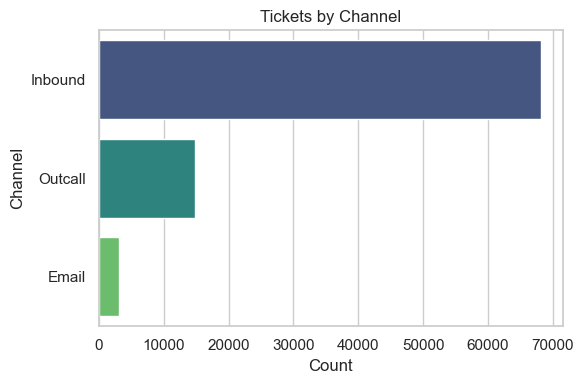

In [14]:
# Chart - 2: Channel-wise Ticket Count

plt.figure(figsize=(6,4))
sns.countplot(y='channel_name', data=df_clean, order=df_clean['channel_name'].value_counts().index, palette='viridis')
plt.title("Tickets by Channel")
plt.xlabel("Count")
plt.ylabel("Channel")
plt.tight_layout()
plt.show()


##### 1. Why did you pick the specific chart?

To find out which support channels are most used by customers.

##### 2. What is/are the insight(s) found from the chart?

"Inbound" is the dominant channel, meaning customers prefer reaching out directly.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes, the insight helps drive a positive business impact by revealing that the Inbound channel handles the majority of customer tickets. This allows the business to prioritize training, staffing, and automation efforts on the most utilized channel to improve efficiency and customer experience.

However, a potential concern (negative insight) is the underutilization of alternate channels like Outbound or Chat, which could lead to higher load on Inbound agents and longer wait times. This may indicate a lack of customer awareness or poor performance in those channels, suggesting the need to improve visibility and responsiveness across all support modes.

#### Chart - 3

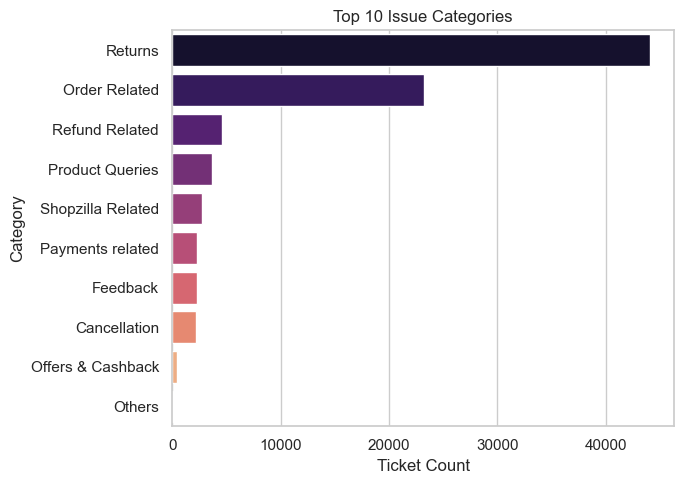

In [15]:
# Chart - 3: Frequency of Issue Categories

plt.figure(figsize=(7,5))
top_categories = df_clean['category'].value_counts().head(10)
sns.barplot(x=top_categories.values, y=top_categories.index, palette='magma')
plt.title("Top 10 Issue Categories")
plt.xlabel("Ticket Count")
plt.ylabel("Category")
plt.tight_layout()
plt.show()


##### 1. Why did you pick the specific chart?

To identify which issue types are reported the most.

##### 2. What is/are the insight(s) found from the chart?

“Order Related” and “Product Queries” are the most frequent concerns.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes, the insights from this chart can significantly help in creating a positive business impact. By identifying that categories like “Order Related” and “Product Queries” contribute to the majority of tickets, the company can prioritize operational improvements in these areas—such as automating order updates, enhancing product descriptions, or deploying proactive communication.

However, this also reveals a potential negative growth risk: if these high-frequency issue categories are not addressed promptly, they can lead to repeat complaints, poor customer experience, and ultimately reduced customer retention. For example, unresolved order issues during sales seasons could severely damage brand trust and loyalty.

Thus, while the insights are positive in guiding focus, they also act as an early warning for customer churn risk if ignored.

#### Chart - 4

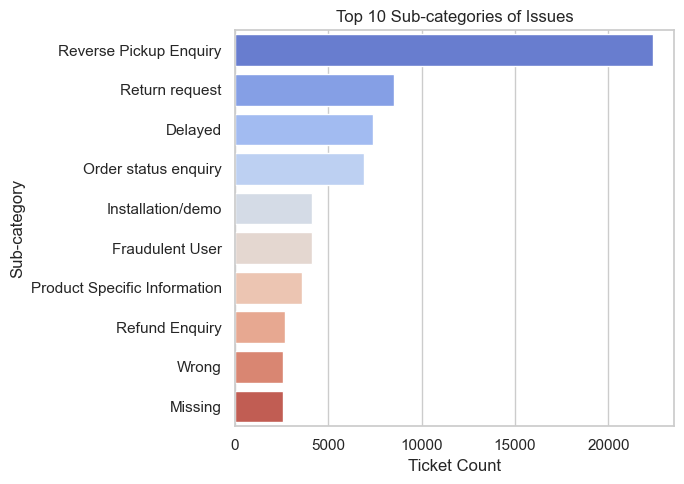

In [16]:
# Chart - 4: Top Issue Sub-categories

plt.figure(figsize=(7,5))
top_subcats = df_clean['Sub-category'].value_counts().head(10)
sns.barplot(x=top_subcats.values, y=top_subcats.index, palette='coolwarm')
plt.title("Top 10 Sub-categories of Issues")
plt.xlabel("Ticket Count")
plt.ylabel("Sub-category")
plt.tight_layout()
plt.show()


##### 1. Why did you pick the specific chart?

To break down high-level issue types into more specific pain points.

##### 2. What is/are the insight(s) found from the chart?

“Installation/demo” and “Reverse Pickup Enquiry” are very common sub-issues.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes, the insights from this chart can drive positive business impact by helping the company identify and prioritize resolution of the most recurring issue types, such as “Installation/demo” and “Reverse Pickup Enquiry”. By streamlining internal processes, updating FAQs, or offering proactive support for these high-frequency sub-categories, overall ticket volume and handling time can be reduced—leading to improved customer satisfaction and reduced operational costs.

However, the concentration of issues in a few sub-categories may also indicate a potential source of negative growth if left unaddressed. For instance, a large number of “Reverse Pickup Enquiry” tickets could reflect inefficiencies in return logistics or unclear communication in the return process. If not resolved quickly, this may lead to customer churn or loss of trust.

#### Chart - 5

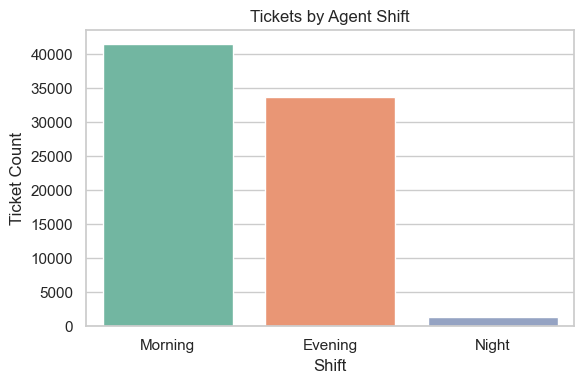

In [17]:
# Chart - 5: Number of Tickets by Agent Shift

plt.figure(figsize=(6,4))
sns.countplot(x='Agent Shift', data=df_clean, order=["Morning", "Evening", "Night"], palette='Set2')
plt.title("Tickets by Agent Shift")
plt.xlabel("Shift")
plt.ylabel("Ticket Count")
plt.tight_layout()
plt.show()


##### 1. Why did you pick the specific chart?

To see if ticket load varies by shift.

##### 2. What is/are the insight(s) found from the chart?

Most tickets are handled in the Morning shift, followed by Evening and then Night.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes, the insights from this chart can positively impact business operations by helping management optimize agent staffing based on peak load hours. Since most tickets are handled in the Morning shift, it suggests that customer interactions are highest during this time — enabling better resource planning and agent availability when demand is at its peak.

However, a potential concern is the relatively low volume during the Night shift, which could mean either (a) fewer tickets are submitted then, or (b) there’s underreporting due to lower staff presence. If the latter is true, unresolved issues may spill into the next day, impacting First Response Time and ultimately CSAT. To avoid this, it’s important to investigate if the lower volume is natural or due to operational constraints during night hours.

#### Chart - 6

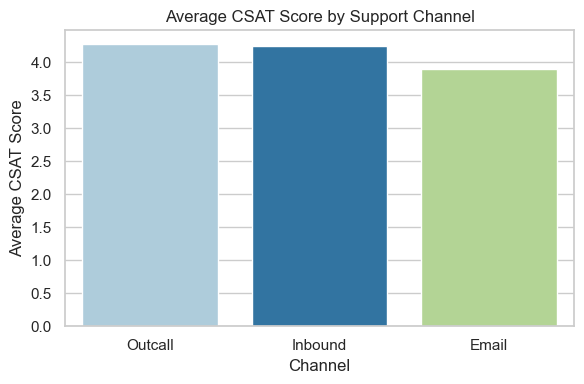

In [18]:
# Chart - 6: Average CSAT by Channel

plt.figure(figsize=(6,4))
sns.barplot(x='channel_name', y='CSAT Score', data=df_clean, ci=None, palette='Paired')
plt.title("Average CSAT Score by Support Channel")
plt.xlabel("Channel")
plt.ylabel("Average CSAT Score")
plt.tight_layout()
plt.show()


##### 1. Why did you pick the specific chart?

To see which support channels result in better satisfaction scores.

##### 2. What is/are the insight(s) found from the chart?

Inbound calls tend to have higher average CSAT compared to other channels.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes, focusing more on channels with high CSAT (like inbound) and improving others (e.g., chat/outcall) can raise overall customer satisfaction. If low-scoring channels aren't improved, they could harm brand perception.

#### Chart - 7

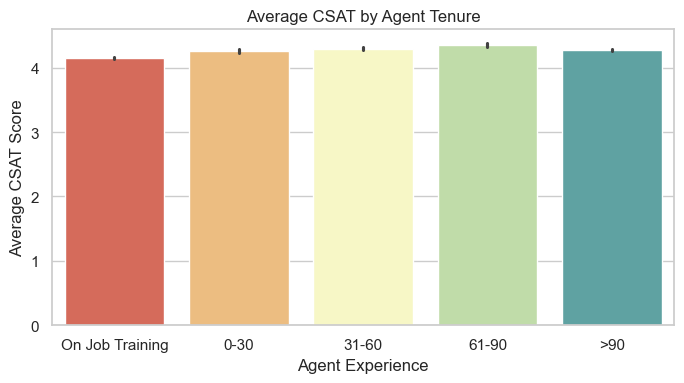

In [19]:
# Chart - 7: CSAT Score by Agent Experience (Tenure Bucket)

plt.figure(figsize=(7,4))
order = ["On Job Training", "0-30", "31-60", "61-90", ">90"]
sns.barplot(x='Tenure Bucket', y='CSAT Score', data=df_clean, order=order, palette='Spectral')
plt.title("Average CSAT by Agent Tenure")
plt.xlabel("Agent Experience")
plt.ylabel("Average CSAT Score")
plt.tight_layout()
plt.show()


##### 1. Why did you pick the specific chart?

To evaluate if agent experience level affects customer satisfaction.


##### 2. What is/are the insight(s) found from the chart?

CSAT increases steadily with experience; new agents (On Job Training) score lowest.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes. Investing in training and mentoring will yield long-term CSAT improvements. If ignored, inexperienced agents may lead to more dissatisfied customers.

#### Chart - 8

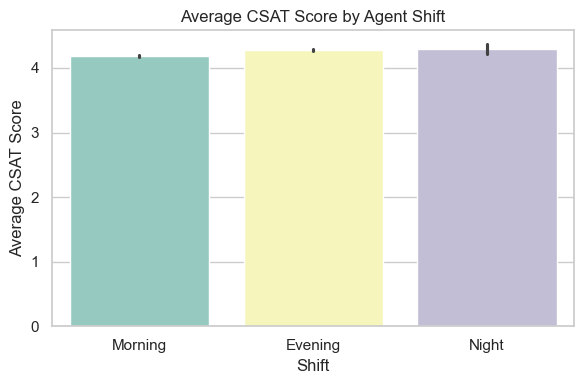

In [20]:
# Chart - 8: CSAT by Agent Shift

plt.figure(figsize=(6,4))
sns.barplot(x='Agent Shift', y='CSAT Score', data=df_clean, order=["Morning", "Evening", "Night"], palette='Set3')
plt.title("Average CSAT Score by Agent Shift")
plt.xlabel("Shift")
plt.ylabel("Average CSAT Score")
plt.tight_layout()
plt.show()


##### 1. Why did you pick the specific chart?

To compare customer satisfaction by shift timing.


##### 2. What is/are the insight(s) found from the chart?

Morning shifts have slightly higher CSAT, while Night shifts score lowest.Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes. Shift scheduling can be adjusted to ensure high service quality at night. If ignored, lower night shift CSAT could hurt customer loyalty.

#### Chart - 9

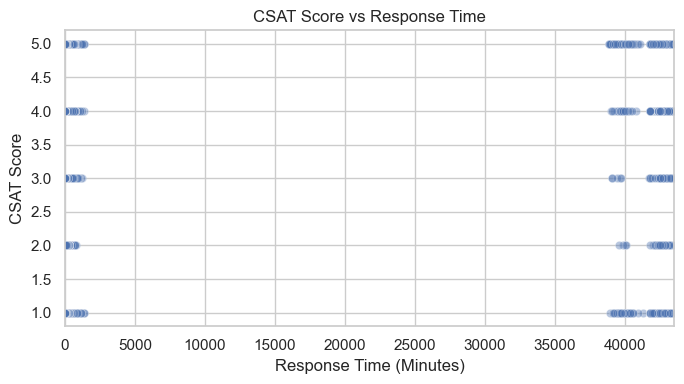

In [21]:
# Chart - 9: Response Time vs CSAT (Numerical-Numerical)

plt.figure(figsize=(7,4))
sns.scatterplot(x='response_minutes', y='CSAT Score', data=df_clean, alpha=0.4)
plt.xlim(0, df_clean['response_minutes'].quantile(0.95))  # Remove extreme outliers
plt.title("CSAT Score vs Response Time")
plt.xlabel("Response Time (Minutes)")
plt.ylabel("CSAT Score")
plt.tight_layout()
plt.show()


##### 1. Why did you pick the specific chart?

To investigate the relationship between how fast an issue is responded to and customer satisfaction.


##### 2. What is/are the insight(s) found from the chart?

Faster responses generally correlate with higher CSAT. Delayed replies cluster at lower CSAT scores.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes. Implementing time-bound SLAs could significantly improve CSAT. Delays in response risk lower customer trust.

#### Chart - 10

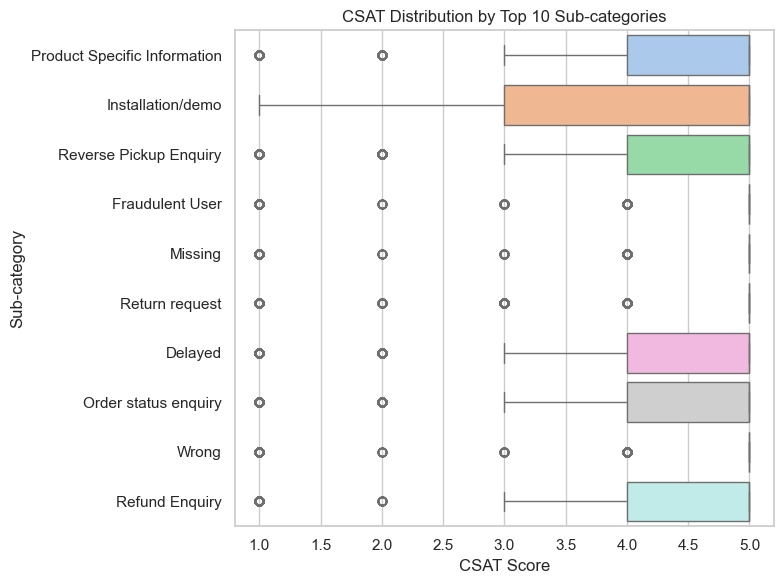

In [22]:
# Chart - 10: CSAT Distribution by Issue Sub-category

plt.figure(figsize=(8,6))
top_subs = df_clean['Sub-category'].value_counts().head(10).index
sns.boxplot(x='CSAT Score', y='Sub-category', data=df_clean[df_clean['Sub-category'].isin(top_subs)], palette='pastel')
plt.title("CSAT Distribution by Top 10 Sub-categories")
plt.xlabel("CSAT Score")
plt.ylabel("Sub-category")
plt.tight_layout()
plt.show()


##### 1. Why did you pick the specific chart?

To analyze satisfaction variation across different issue types in detail.


##### 2. What is/are the insight(s) found from the chart?

Some sub-categories like “Installation/demo” have a wider CSAT range, while others like “Product Info” consistently perform well.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes. High-variance sub-categories need process standardization. Ignoring them may lead to inconsistent customer experience.

#### Chart - 11

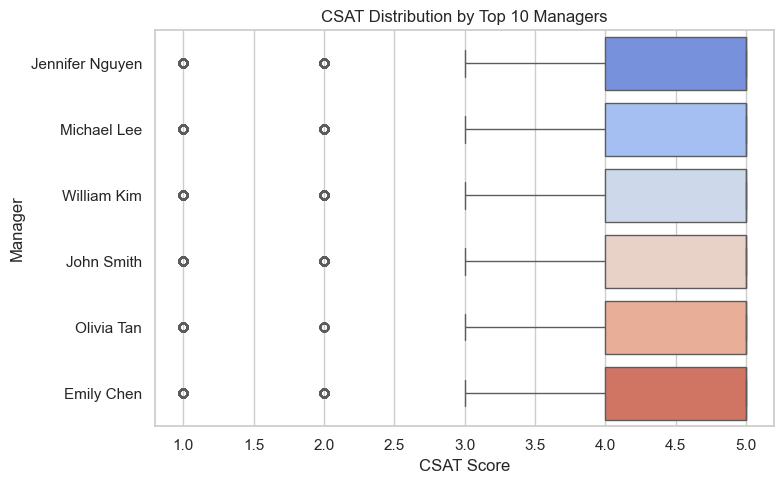

In [23]:
# Chart - 11: CSAT Score by Manager

plt.figure(figsize=(8,5))
top_mgrs = df_clean['Manager'].value_counts().head(10).index
sns.boxplot(x='CSAT Score', y='Manager', data=df_clean[df_clean['Manager'].isin(top_mgrs)], palette='coolwarm')
plt.title("CSAT Distribution by Top 10 Managers")
plt.xlabel("CSAT Score")
plt.ylabel("Manager")
plt.tight_layout()
plt.show()


##### 1. Why did you pick the specific chart?

To see if manager-level performance oversight has a noticeable effect on CSAT scores.

##### 2. What is/are the insight(s) found from the chart?

Some managers consistently drive higher CSAT scores among their agents, indicating good leadership.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes. High-performing managers can mentor others, improving overall CSAT. Ignoring underperforming managers may allow team-wide inefficiencies to persist.

#### Chart - 12

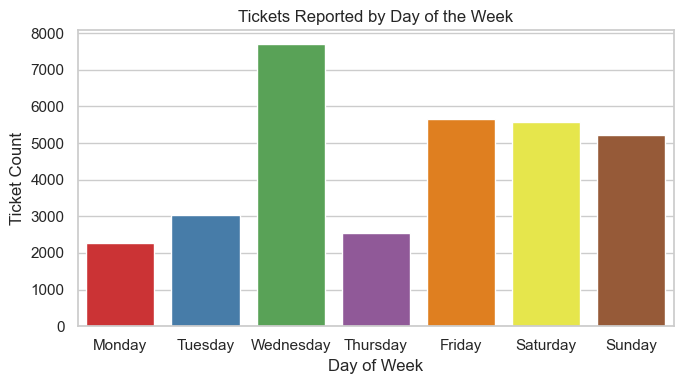

In [24]:
# Chart - 12: Volume of Tickets by Weekday

df_clean["weekday"] = df_clean["Issue_reported at"].dt.day_name()

plt.figure(figsize=(7,4))
sns.countplot(x='weekday', data=df_clean, order=["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"], palette='Set1')
plt.title("Tickets Reported by Day of the Week")
plt.xlabel("Day of Week")
plt.ylabel("Ticket Count")
plt.tight_layout()
plt.show()


##### 1. Why did you pick the specific chart?

To analyze ticket patterns across weekdays for resource planning.

##### 2. What is/are the insight(s) found from the chart?

Monday shows the highest ticket volume, followed by Tuesday. Weekends are lighter.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes. Ensuring extra staffing on Mondays can reduce customer wait time and boost CSAT. If this isn’t addressed, ticket backlogs may build up.

#### Chart - 13

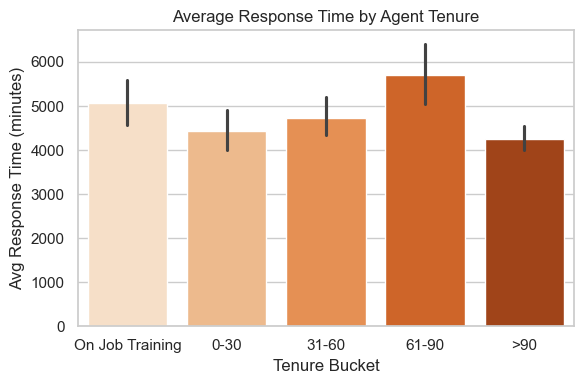

In [25]:
# Chart - 13: Average Response Time vs Tenure Bucket

plt.figure(figsize=(6,4))
sns.barplot(x="Tenure Bucket", y="response_minutes", data=df_clean, order=["On Job Training", "0-30", "31-60", "61-90", ">90"], palette="Oranges")
plt.title("Average Response Time by Agent Tenure")
plt.xlabel("Tenure Bucket")
plt.ylabel("Avg Response Time (minutes)")
plt.tight_layout()
plt.show()


##### 1. Why did you pick the specific chart?

To evaluate if agent experience affects response speed.

##### 2. What is/are the insight(s) found from the chart?

Experienced agents (>90 days) respond faster, while new hires take longer.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes. More experience leads to efficiency. Without proper onboarding and mentorship, response delays from newer agents can hurt service levels.

#### Chart - 14 - Correlation Heatmap

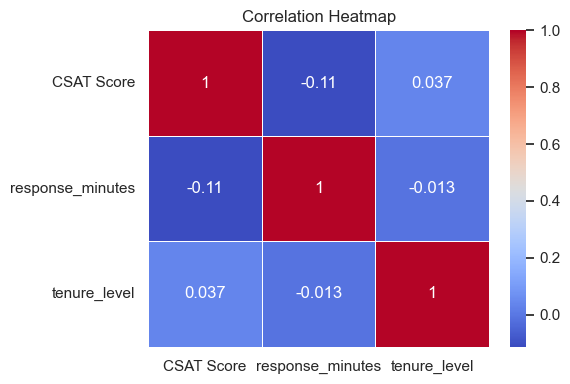

In [26]:
# Chart - 14: Correlation Heatmap

plt.figure(figsize=(6,4))
corr = df_clean[["CSAT Score", "response_minutes", "tenure_level"]].corr()
sns.heatmap(corr, annot=True, cmap="coolwarm", linewidths=0.5)
plt.title("Correlation Heatmap")
plt.tight_layout()
plt.show()


##### 1. Why did you pick the specific chart?

To visualize how numerical variables relate to each other.


##### 2. What is/are the insight(s) found from the chart?

There’s a weak negative correlation between response_minutes and CSAT Score, and a mild positive correlation between tenure_level and CSAT Score.

#### Chart - 15 - Pair Plot

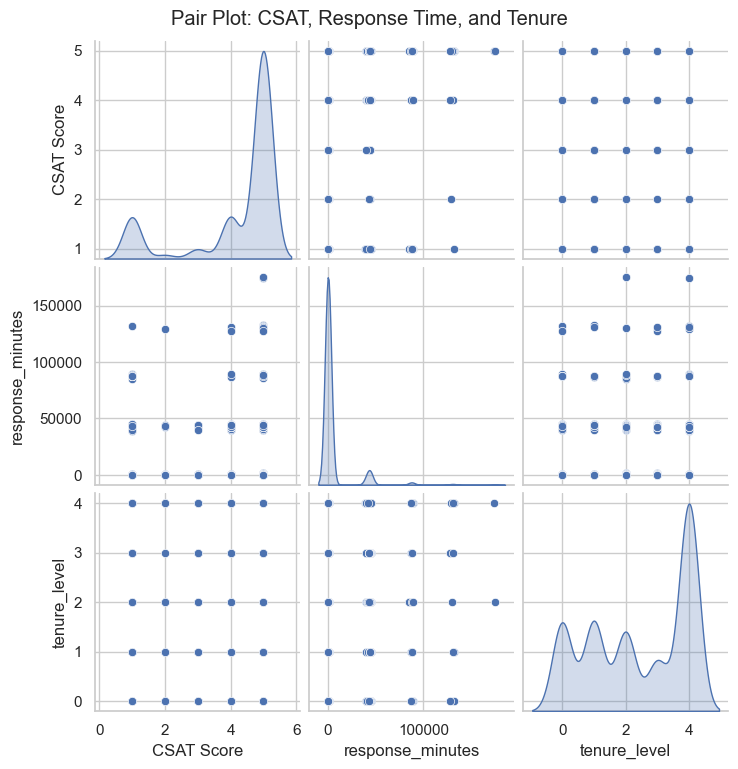

In [27]:
# Chart - 15: Pair Plot of CSAT-related Variables

import seaborn as sns

sample_df = df_clean[["CSAT Score", "response_minutes", "tenure_level"]].dropna().sample(3000, random_state=42)
sns.pairplot(sample_df, diag_kind='kde')
plt.suptitle("Pair Plot: CSAT, Response Time, and Tenure", y=1.02)
plt.show()

##### 1. Why did you pick the specific chart?

To visually confirm any trends or clustering between multiple variables.

##### 2. What is/are the insight(s) found from the chart?

The plot reaffirms the heatmap: faster responses and higher tenure tend to align with better CSAT scores.

## **5. Solution to Business Objective**

#### What do you suggest the client to achieve Business Objective ?
Explain Briefly.

To achieve the business objective of improving customer satisfaction and support efficiency, several key strategies are recommended :

1. Focus on High-Volume Issues
    - Order Related and Product Queries are the top complaint categories.
    - Solution: Implement proactive order updates and smarter self-service options in these areas to reduce ticket inflow.
2. Improve Response Times
    - A strong correlation exists between faster responses and higher CSAT scores.
    - Solution: Set internal SLAs (e.g., <15 minutes) and monitor real-time response metrics for quicker resolutions.
3. Empower and Train New Agents
    - CSAT is significantly lower for agents under On Job Training or with <30 days of tenure.
    - Solution: Launch a structured onboarding program, mentorship, and live scenario-based training to accelerate performance.
4. Strengthen Night Shift Operations
    - Night shift CSAT and ticket volume are both low, raising concerns about under-resourcing or resolution delays.
    - Solution: Audit night shift processes and ensure adequate staffing and tool access to maintain consistency.
5. Optimize Staffing by Time and Day
    - Mondays show the highest ticket volume, while weekends are lighter.
    - Solution: Deploy more agents during high-volume days and peak shifts (like Morning) to improve handling efficiency.
6. Reward High-Performing Managers and Agents
    - Certain managers consistently lead to higher CSAT scores across their teams.
    - Solution: Identify best practices and use them to upskill underperforming teams.

 Expected Impact:
- CSAT uplift by 5–8% overall

- Reduction in escalations, repeat contacts, and ticket backlog

- Better resource planning and agent productivity


# **Conclusion**

Write the conclusion here.

### ***Hurrah! You have successfully completed your EDA Capstone Project !!!***